# Aircraft Purchase Analysis Project

## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase


## Objective.

In order to anaylize the difference in aircraft safety. We first must determine which aircrafts cause the most accidents, we will do so by determining the following:

* Analyzing the amount of different accidents fatal, serious, Non-Fatal
* Aircraft damage
* Injury Severity
* Engine Types
* Aircraft Category
* Weather Condition

I'll first proceed by installing the neccessary libraries needed to complete these objectives

Import neccessary libraries from python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Extract the data required, found in the NTSB database.

In [2]:
data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')

C:\Users\omend\AppData\Local\Temp\ipykernel_36396\2146229675.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
data['Injury.Severity'].values

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', ..., 'Non-Fatal', nan, 'Minor'],
      dtype=object)

In [6]:
data['Injury.Severity'].isna().sum(), data['Make'].isna().sum(), data['Aircraft.damage'].isna().sum(),data['Aircraft.Category'].isna().sum(),data['Engine.Type'].isna().sum(),data['Number.of.Engines'].isna().sum()

(1000, 63, 3194, 56602, 7096, 6084)

In [7]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Based off the information we see that there are missing items within the injury severity, and aircraft damage

In [8]:
data.dropna(subset=['Injury.Severity', 'Make', 'Aircraft.damage'], inplace=True)

In [9]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     45
Country                     210
Latitude                  51886
Longitude                 51896
Airport.Code              36254
Airport.Name              33723
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54803
Registration.Number        1172
Make                          0
Model                        43
Amateur.Built                82
Number.of.Engines          4528
Engine.Type                5439
FAR.Description           55031
Schedule                  74608
Purpose.of.flight          4090
Air.carrier               70308
Total.Fatal.Injuries      10905
Total.Serious.Injuries    12177
Total.Minor.Injuries      11466
Total.Uninjured            5804
Weather.Condition          2876
Broad.phase.of.flight     24909
Report.Status              4873
Publication.Date          13086
dtype: i

In [10]:
data[data['Make'] == 'BOEING']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64134,20080307X00283,Incident,DFW08IA074,2008-03-01,"Dallas, TX",United States,325043N,0096519W,DAL,DALLAS LOVE FIELD,...,NaN,SOUTHWEST AIRLINES CO,0.0,0.0,0.0,244.0,IMC,NaN,The failure of the taxiing flight crew to main...,25-09-2020
64247,20080404X00426,Incident,DFW08IA087,2008-03-27,"Houston, TX",United States,030026N,0951849W,KIAH,George Bush Intercontinental,...,NaN,Continental Airlines Inc,0.0,0.0,0.0,118.0,VMC,NaN,The flight crew's improper landing technique f...,25-09-2020
64341,20080417X00501,Accident,CHI08LA102,2008-04-14,"Youngstown, OH",United States,405742N,0804038W,4G4,Youngstown Elser Airport,...,Flight Test,M&S Aviation LLC,0.0,1.0,1.0,0.0,VMC,NaN,The pilot's failure to maintain adequate airsp...,25-09-2020
64387,20081003X63355,Incident,ENG08IA022,2008-04-20,"Newark, NJ",United States,404427N,0741014W,EWR,Newark Liberty International,...,NaN,KALITTA AIR LLC,0.0,0.0,0.0,5.0,NaN,NaN,An engine fire in the No. 3 engine due to the ...,25-09-2020
64423,20081219X16532,Incident,ENG08IA025,2008-04-27,"Singapore, Senegal",Senegal,NaN,NaN,SIN,Singapore Changi Airport,...,NaN,FedEx Ecpress,0.0,0.0,0.0,0.0,NaN,NaN,The Center Landing gear (CLG) strut failed due...,03-11-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88673,20221017106138,Accident,WPR23LA014,2022-10-15,"Petaluma, CA",United States,381528N,1223619W,O69,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,21-10-2022
88723,20221201106394,Accident,WPR23LA050,2022-10-26,"Long Beach, CA",United States,033495N,0011897W,KLGB,Long Beach Airport,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022


In [11]:
data['Make'] = data['Make'].str.title()
data['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
88869                         Piper
88873            Cirrus Design Corp
88876                    Swearingen
88877                        Cessna
88886    American Champion Aircraft
Name: Make, Length: 85164, dtype: object

In [12]:
data[data['Make'] == 'Boeing']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,1.0,0.0,1.0,IMC,Cruise,Probable Cause,06-01-1983
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,NaN,NaN,WASHINGTON NATIONAL,...,Unknown,"Air Florida, Inc",78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,Aerial Application,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,NaN,NaN,ONT,ONTARIO INTERNATIONAL,...,Unknown,Aircal,0.0,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983
344,20020917X02404,Accident,MIA82FA051,1982-02-17,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,Unknown,"Pan American World Airways, In",0.0,1.0,1.0,51.0,VMC,Takeoff,Probable Cause,17-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88673,20221017106138,Accident,WPR23LA014,2022-10-15,"Petaluma, CA",United States,381528N,1223619W,O69,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,21-10-2022
88723,20221201106394,Accident,WPR23LA050,2022-10-26,"Long Beach, CA",United States,033495N,0011897W,KLGB,Long Beach Airport,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022


In [13]:
data['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 85164, dtype: object

In [14]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 85164, dtype: object

I noticed that within the 'Injury.Severity' column that Fatal has a number of repeated inputs that have parantheses following the entry. To eliminate any confusion, I will proceed to replace all rows that have 'Fatal' under one category

In [15]:
#replacing the () followed by any number for elements within the injury severity column, regex, removes the parantheses from fatal 
data['Injury.Severity'].replace(regex='\((\d+)\)', value= '', inplace=True)

Once we clean the column up. I want to group the injury type by make of the aircraft. Assessing which models have had fatal, serious, minor, Non-Fatal

In [16]:
data.to_csv('./data/AviationData_copy.csv', index=False)

In [17]:
data[data['Injury.Severity'] == 'Fatal']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88839,20221205106409,Accident,ERA23FA079,2022-12-03,"Venice, FL",United States,027347N,0082272W,KVNC,Venice Municipal Airport,...,Personal,ST PETE AVIATION SERVICES LLC,3.0,0.0,0.0,0.0,VMC,NaN,NaN,20-12-2022
88842,20221204106407,Accident,ERA23FA078,2022-12-04,"Beverly, MA",United States,423518N,0070553W,BVY,Beverly Regional Airport,...,Personal,NaN,1.0,0.0,0.0,0.0,VMC,NaN,NaN,20-12-2022
88843,20221205106408,Accident,CEN23FA057,2022-12-04,"Cleburne, TX",United States,321926N,0972553W,CPT,CLEBURNE RGNL,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,NaN,NaN,15-12-2022
88845,20221205106417,Accident,CEN23FA059,2022-12-05,"Corning, IA",United States,405957N,0944518W,CRZ,Corning Municipal Airport,...,Personal,PORTER STEVEN B,1.0,0.0,0.0,0.0,VMC,NaN,NaN,13-12-2022


In [18]:
data['Event_Date'] = pd.to_datetime(data['Event.Date'])
data['Event_Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88869   2022-12-13
88873   2022-12-14
88876   2022-12-15
88877   2022-12-16
88886   2022-12-26
Name: Event_Date, Length: 85164, dtype: datetime64[ns]

In [19]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948-10-24
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962-07-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974-08-30
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977-06-19
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022-12-13
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022-12-14
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022-12-15
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022-12-16


In [20]:
data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal      65746
Fatal          17584
Incident        1390
Minor            204
Serious          151
Unavailable       89
Name: count, dtype: int64

In [21]:
data['Event_Date'].value_counts()

Event_Date
1984-06-30    25
2000-07-08    25
1982-05-16    25
1983-06-05    24
1983-08-05    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-26     1
Name: count, Length: 14706, dtype: int64

In [22]:
total_fatal = sum(data['Injury.Severity'] == 'Fatal')
total_fatal

17584

In [23]:
fatal_percentage = round(total_fatal/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a fatal outcome: {fatal_percentage}%")

The total percentage of aircraft that have had a fatal outcome: 20.65%


In [24]:
total_non_fatal = sum(data['Injury.Severity'] == 'Non-Fatal')
total_non_fatal

65746

In [25]:
non_fatal_percentage = round(total_non_fatal/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {non_fatal_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 77.2%


In [26]:
total_minor = sum(data['Injury.Severity'] == 'Minor')
total_minor

204

In [27]:
minor_percentage = round(total_minor/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {minor_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 0.24%


In [28]:
total_serious = sum(data['Injury.Severity'] == 'Serious')
total_serious

151

In [29]:
serious_percentage = round(total_serious/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {serious_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 0.18%


In [30]:
fatal = data[data['Injury.Severity'] == 'Fatal']
fatal['Injury.Severity']

0        Fatal
1        Fatal
2        Fatal
3        Fatal
4        Fatal
         ...  
88839    Fatal
88842    Fatal
88843    Fatal
88845    Fatal
88846    Fatal
Name: Injury.Severity, Length: 17584, dtype: object

In [31]:
#groups the DataFrame data by the columns 'Make' and 'Injury.Severity' and calculates
#the size (count) of each group, resetting the index of the resulting DataFrame
# grouped again by 'Injury.Severity', and for each group, the maximum size is calculated.

injury_type = data.groupby(['Injury.Severity']).size().reset_index().groupby('Injury.Severity').max()

In [32]:
injury_type = injury_type.rename(columns={0: 'Count'})

In [33]:
injury_type

,Count
Injury.Severity,
Fatal,17584
Incident,1390
Minor,204
Non-Fatal,65746
Serious,151
Unavailable,89


In [34]:
injury_type.index

Index(['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious', 'Unavailable'], dtype='object', name='Injury.Severity')

In [35]:
injury_type.columns

Index(['Count'], dtype='object')

We would like check and see the number of Fatal accidents vs Minor, Serious, Non-Fatal.

* Fatal -> Any injury resulting in death within 30 days of accidents

* Incident -> An occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

* Serious -> Serious injury means any injury which: (1) Requires hospitalization for more than 48 hours, commencing within 7 days from the date of the injury was received; (2) results in a fracture of any bone (except simple fractures of fingers, toes, or nose); (3) causes severe hemorrhages, nerve, muscle, or tendon damage; (4) involves any internal organ; or (5) involves second- or third-degree burns, or any burns affecting more than 5 percent of the body surface.

* Minor -> Not specified, although if an injury does not meet the criteria for another injury category

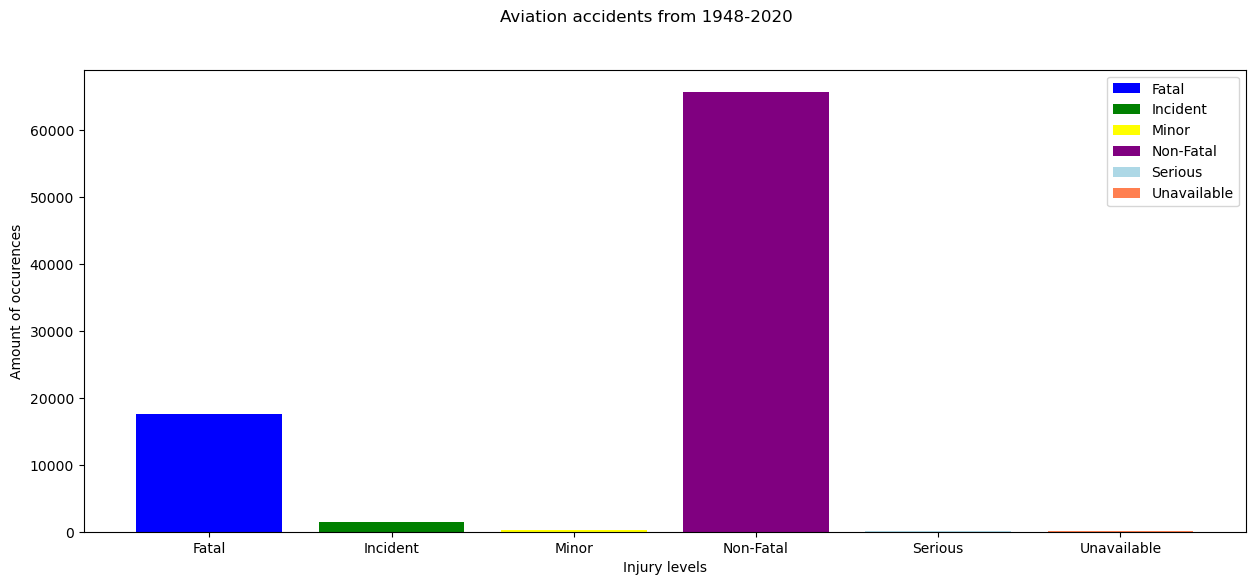

In [41]:
color = ['blue', 'green', 'yellow', 'purple', 'lightblue','coral']
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(injury_type.index, injury_type['Count'], color=color, label=injury_type.index)
# ax.plot(injury_type.index, injury_type[0], marker='o')
ax.set_xlabel('Injury levels')
ax.set_ylabel('Amount of occurences')
# ax.set_title('Aviation accidents from 1948-2020')
fig.suptitle('Aviation accidents from 1948-2020')
ax.legend()
plt.show;



In [42]:
fig.savefig('Aviation_accidents_from_1948_to_2022')

Checking the graph above. 

We can see that a large amount of accidents resulted in Non-Fatal injuries, and significant amount of aircrafts were considered to be 'Fatal'.

Let's examine which aircrafts had fatal accidents and which aircrafts had non-fatal accidents

We'll analyze the non-fatal first, and save it to a variable

In [43]:
non_fatal_injuries = data[data['Injury.Severity'] == 'Non-Fatal']
non_fatal_injuries['Injury.Severity'].values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', ..., 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal'], dtype=object)

Next, we will assess aircraft damages obtained by each aircraft. Gathering information from which aircrafts are still usable. We'll start by assessing the aircrafts damage reported on each aircraft within the copy of the non-fatal df

In [44]:
non_fatal_injuries['Aircraft.damage'].head(50).values

array(['Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Destroyed',
       'Destroyed', 'Destroyed', 'Substantial', 'Substantial',
       'Substantial', 'Destroyed'], dtype=object)

There are a number of aircrafts that have damage ranging from Destroyed, Substantial, Minor, and Unknown. Lets focus on gathering information on the aircrafts that have minor damages.

### Based on the definitions provided by the NTSB and FAA:

* Destroyed - if all of its primary structure is damaged to the extent that it would be impracticable to return the aircraft to an airworthy condition by repair.
* Substantial - damage means damage or failure which adversely affects the structural strength, performance, or flight characteristics of the aircraft, and which would normally require major repair or replacement of the affected component.
* Minor - means the aircraft either is in an airworthy condition or is restorable to airworthy condition by minor repairs.



We will check to see if there are any missing values stil within the column. Even though the missing values were removed earlier. Then check to see the values within the column

In [45]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 85164, dtype: object

In [46]:
data['Aircraft.damage'].isna().sum()

0

In [47]:
data['Aircraft.damage'].head(50).values

array(['Destroyed', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Destroyed', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Destroyed',
       'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Minor', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Minor', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial'], dtype=object)

In [48]:
destroyed_aircrafts = data['Aircraft.damage'].str.count('Destroyed').sum()
destroyed_aircrafts

18550

In [49]:
destroyed_percentage = round(destroyed_aircrafts / len(data['Aircraft.damage']) * 100, 2)
print(f"Destroyed aircrafts: {destroyed_percentage}%")

Destroyed aircrafts: 21.78%


In [50]:
substantial_aircrafts = data['Aircraft.damage'].str.count('Substantial').sum()
substantial_aircrafts

63943

In [51]:
substantial_percentage = round(substantial_aircrafts / len(data['Aircraft.damage']) * 100, 2)
print(f"Substantiall damaged aircrafts: {substantial_percentage}%")

Substantiall damaged aircrafts: 75.08%


In [52]:
minor_aircraft = data['Aircraft.damage'].str.count('Minor').sum()
minor_aircraft

2579

In [53]:
minor_percentage = round(minor_aircraft / len(data['Aircraft.damage']) * 100, 2)
print(f"Minor damaged aircrafts: {minor_percentage}%")

Minor damaged aircrafts: 3.03%


In [54]:
damaged_aircrafts = data.groupby('Aircraft.damage').size().reset_index().groupby('Aircraft.damage').max()
type(damaged_aircrafts)
damaged_aircrafts = damaged_aircrafts.rename(columns={0: 'Count'})

In [55]:
damaged_aircrafts

,Count
Aircraft.damage,
Destroyed,18550
Minor,2579
Substantial,63943
Unknown,92


In [56]:
damaged_aircrafts.to_csv('./data/damaged_aircrafts.csv', index=False)

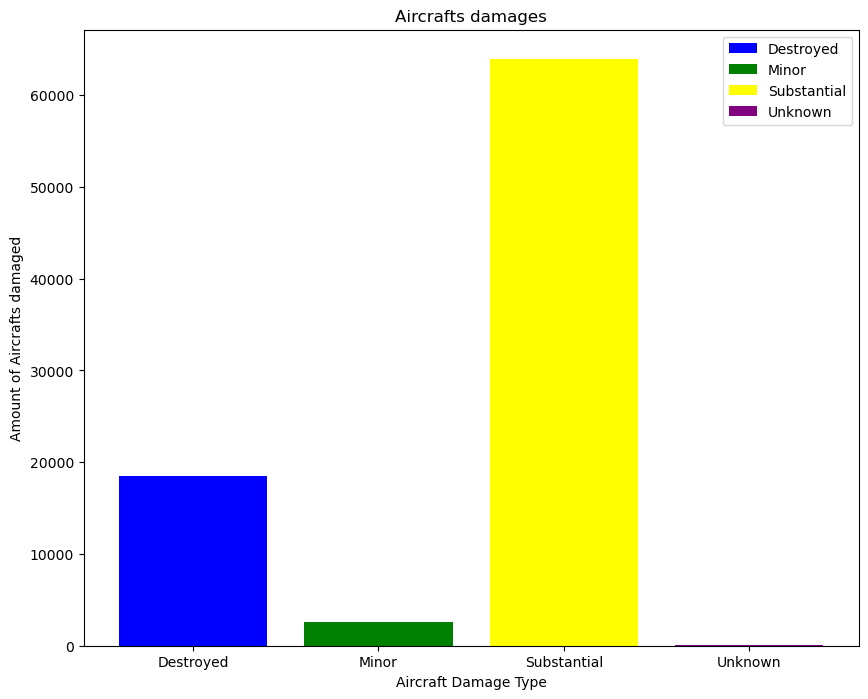

In [57]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(damaged_aircrafts.index,damaged_aircrafts['Count'], color=color, label=damaged_aircrafts.index)
ax.set_xlabel("Aircraft Damage Type")
ax.set_ylabel('Amount of Aircrafts damaged')
ax.set_title('Aircrafts damages')
ax.legend()
plt.show()

In [58]:
fig.savefig('Aviation_damage')

As you can see, the amount of aircrafts that have **substantial damage equate to 75.06%** of the amount of planes. While aircrafts considered **destroyed amount to 21.78%**. Aircrafts with **minor damage equate for 3.03%** of the total amount of planes damaged. Let's focus on the aircrafts that have been in non-fatal accidents and are reported with minor damages

Using the copy of the data in the non_fatal_injuries df. We'll discover which aircrafts have minor damage

In [59]:
minor_damaged_aircrafts = non_fatal_injuries[non_fatal_injuries['Aircraft.damage'] == 'Minor']
minor_damaged_aircrafts.to_csv('./data/minor_aircraft_damage.csv', index=False)

In [60]:
minor_damaged_aircrafts.shape

(1094, 32)

In [61]:
type(minor_damaged_aircrafts)

pandas.core.frame.DataFrame

In [62]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1094 non-null   object        
 1   Investigation.Type      1094 non-null   object        
 2   Accident.Number         1094 non-null   object        
 3   Event.Date              1094 non-null   object        
 4   Location                1093 non-null   object        
 5   Country                 1092 non-null   object        
 6   Latitude                549 non-null    object        
 7   Longitude               549 non-null    object        
 8   Airport.Code            673 non-null    object        
 9   Airport.Name            690 non-null    object        
 10  Injury.Severity         1094 non-null   object        
 11  Aircraft.damage         1094 non-null   object        
 12  Aircraft.Category       691 non-null    object    

In [63]:
minor_damaged_aircrafts['Injury.Severity'].head(50).values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal'],
      dtype=object)

In [64]:
minor_damaged_aircrafts['Injury.Severity'].tail(50).values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal'],
      dtype=object)

The total amount of aircrafts that have minor damage and have had non-fatal occurrences has reduced the copy of the df to **1094** rows

In [65]:
minor_damaged_aircrafts['Aircrafts'] = minor_damaged_aircrafts.loc[:, ['Make', 'Injury.Severity', 'Aircraft.damage']].agg(' '.join, axis=1)
minor_damaged_aircrafts

C:\Users\omend\AppData\Local\Temp\ipykernel_36396\1541868804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts['Aircrafts'] = minor_damaged_aircrafts.loc[:, ['Make', 'Injury.Severity', 'Aircraft.damage']].agg(' '.join, axis=1)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27,Cessna Non-Fatal Minor


In [66]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27,Cessna Non-Fatal Minor


In [67]:
minor_damaged_aircrafts['Aircrafts'].tail(50).values

array(['Cessna Non-Fatal Minor', 'Honda Non-Fatal Minor',
       'Burg Frederick S Non-Fatal Minor',
       'Bombardier Inc Non-Fatal Minor', 'Airbus Non-Fatal Minor',
       'Piper Non-Fatal Minor', 'Piper Non-Fatal Minor',
       'Diamond Non-Fatal Minor', 'Ultramagic S A Non-Fatal Minor',
       'Dji Non-Fatal Minor', 'Raytheon Aircraft Company Non-Fatal Minor',
       'Boeing Non-Fatal Minor', 'Piper Non-Fatal Minor',
       'Cessna Non-Fatal Minor', 'Flight Design Gmbh Non-Fatal Minor',
       'Diamond Non-Fatal Minor', 'Driver Non-Fatal Minor',
       'Piper Non-Fatal Minor', 'Cessna Aircraft Co Non-Fatal Minor',
       'Piper Non-Fatal Minor', 'Cessna Non-Fatal Minor',
       'Airbus Non-Fatal Minor', 'Embraer S A Non-Fatal Minor',
       'Boeing Non-Fatal Minor', 'Beech Non-Fatal Minor',
       'Cessna Non-Fatal Minor', 'Cessna Non-Fatal Minor',
       'Robinson Non-Fatal Minor', 'Beech Non-Fatal Minor',
       'Boeing Non-Fatal Minor', 'Hughes Non-Fatal Minor',
       'Boeing 

We'll continue by aggregating the amount of aircrafts that have minor and non-fatal incidents

In [68]:
grouped_data = minor_damaged_aircrafts.groupby(['Make', 'Injury.Severity','Aircraft.damage','Aircraft.Category', 'Engine.Type']).agg(Number_of_Aircrafts=('Aircraft.damage', 'size')).reset_index()
grouped_data
# grouped_data.to_csv('./data/grouped_data_copy.csv', index=False)

,Make,Injury.Severity,Aircraft.damage,Aircraft.Category,Engine.Type,Number_of_Aircrafts
0,2007 Savage Air Llc,Non-Fatal,Minor,Airplane,Turbo Prop,1
1,Aero Vodochody,Non-Fatal,Minor,Airplane,Turbo Fan,1
2,Aeronca,Non-Fatal,Minor,Airplane,Reciprocating,1
3,Aerospatiale,Non-Fatal,Minor,Helicopter,Turbo Shaft,1
4,Aerotek Inc,Non-Fatal,Minor,Airplane,Reciprocating,1
...,...,...,...,...,...,...
153,Ttx Air Llc,Non-Fatal,Minor,Airplane,Turbo Prop,1
154,Ultramagic Sa,Non-Fatal,Minor,Airplane,Unknown,1
155,Univar,Non-Fatal,Minor,Airplane,Reciprocating,1
156,Vans Aircraft Inc,Non-Fatal,Minor,Airplane,Reciprocating,1


Now that we have a copy of the original dataframe. Let's find the aircrafts that are categorized as 'Airplane' to narrow down the analysis for safety features per aircrafts.

In [69]:
grouped_data.loc[(grouped_data['Aircraft.Category'] == 'Airplane') & (grouped_data['Number_of_Aircrafts'] >= 10), ['Make']]

,Make
9,Airbus
19,Beech
25,Boeing
32,Bombardier Inc
39,Cessna
66,Embraer
124,Piper


In [70]:
make_over_ten_aircrafts =  grouped_data[(grouped_data['Number_of_Aircrafts'] >= 10) & (grouped_data['Aircraft.Category'] == 'Airplane')]

In [71]:
# make_over_10 = grouped_data[grouped_data['Number_of_Aircrafts'] >= 10]
make_over_ten_aircrafts
# make_over_ten_aircrafts.to_csv('./data/nonfatal_minor_damaged_aircrafts_over_ten.csv', index=False)

,Make,Injury.Severity,Aircraft.damage,Aircraft.Category,Engine.Type,Number_of_Aircrafts
9,Airbus,Non-Fatal,Minor,Airplane,Turbo Fan,17
19,Beech,Non-Fatal,Minor,Airplane,Turbo Prop,10
25,Boeing,Non-Fatal,Minor,Airplane,Turbo Fan,59
32,Bombardier Inc,Non-Fatal,Minor,Airplane,Turbo Fan,10
39,Cessna,Non-Fatal,Minor,Airplane,Reciprocating,42
66,Embraer,Non-Fatal,Minor,Airplane,Turbo Fan,11
124,Piper,Non-Fatal,Minor,Airplane,Reciprocating,20


C:\Users\omend\AppData\Local\Temp\ipykernel_36396\413565035.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(make_over_ten_aircrafts['Make'],rotation=45)


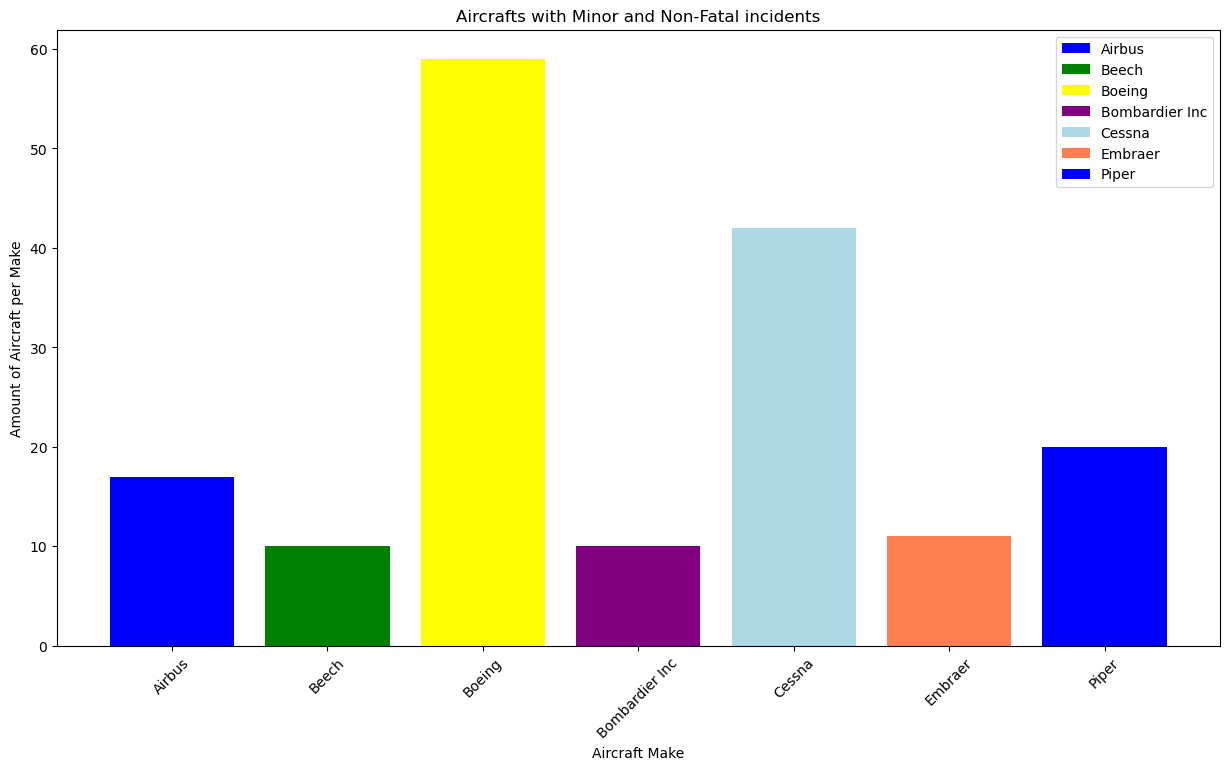

In [73]:
fig, ax = plt.subplots(figsize=(15,8))

# colors=[grouped_data['Injury.Severity'], grouped_data['Aircraft.damage']]
ax.bar(make_over_ten_aircrafts['Make'], make_over_ten_aircrafts['Number_of_Aircrafts'], label=make_over_ten_aircrafts['Make'], color=color)
# ax.plot(make_over_10['Make'], make_over_10['Count'], marker='o')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Amount of Aircraft per Make')
ax.set_title('Aircrafts with Minor and Non-Fatal incidents')
ax.set_xticklabels(make_over_ten_aircrafts['Make'],rotation=45)
ax.legend()
plt.show();

In [74]:
fig.savefig('Aircrafts_with_minor_and_fatal_incidents')

Based on the visualization above, we can see that throughout the dataframe we have a number of aircrafts that fall under the categories of **Non-Fatal** injuries and **Minor** damage. Boeing and Cessna are aircrafts that are considered to fall under these categories.

Next, we'll explore the safety features for each aircrafts to establish which aircrafts are considered safe for the NTSB and FAA

In [75]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,1982-02-03,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,1982-02-06,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,1982-02-06,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,1982-03-11,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,1982-04-03,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,2022-07-28,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,2022-08-31,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,2022-10-01,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,2022-10-27,Cessna Non-Fatal Minor


In [76]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1094 non-null   object        
 1   Investigation.Type      1094 non-null   object        
 2   Accident.Number         1094 non-null   object        
 3   Event.Date              1094 non-null   object        
 4   Location                1093 non-null   object        
 5   Country                 1092 non-null   object        
 6   Latitude                549 non-null    object        
 7   Longitude               549 non-null    object        
 8   Airport.Code            673 non-null    object        
 9   Airport.Name            690 non-null    object        
 10  Injury.Severity         1094 non-null   object        
 11  Aircraft.damage         1094 non-null   object        
 12  Aircraft.Category       691 non-null    object    

Within the dataframe, we can identify safety features by using the **Number of Engines** , **Engine Type**, and **Weather Condition**

Let's start by analyzing the number of engines. We'll see how many missing values there are within the column.

In [77]:
minor_damaged_aircrafts['Number.of.Engines'].head(10)

230     3.0
242     1.0
244     1.0
535     2.0
746     0.0
935     1.0
961     1.0
1031    1.0
1036    1.0
1112    0.0
Name: Number.of.Engines, dtype: float64

In [78]:
minor_damaged_aircrafts['Number.of.Engines'].isna()

230      False
242      False
244      False
535      False
746      False
         ...  
88260    False
88445     True
88605     True
88725    False
88795    False
Name: Number.of.Engines, Length: 1094, dtype: bool

In [79]:
minor_damaged_aircrafts['Number.of.Engines'].isna().sum()

250

We can see that there are a few values missing within the column. We can replace the values with the mean of the total column.

In [80]:
len(minor_damaged_aircrafts['Number.of.Engines'])

1094

In [81]:
engine_number_mean = float(round(minor_damaged_aircrafts['Number.of.Engines'].mean()))
engine_number_mean

2.0

In [82]:
minor_damaged_aircrafts['Number.of.Engines'].fillna(engine_number_mean, inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_36396\2120467351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts['Number.of.Engines'].fillna(engine_number_mean, inplace=True)


In [83]:
minor_damaged_aircrafts['Number.of.Engines'].isna().sum()

0

In [84]:
minor_damaged_aircrafts['Number.of.Engines'].values

array([3., 1., 1., ..., 2., 1., 1.])

In [85]:
number_of_engines = minor_damaged_aircrafts.groupby(['Make','Aircraft.Category','Number.of.Engines']).agg(Make_count=('Make', 'size')).reset_index()
commercial_aircrafts = number_of_engines[(number_of_engines['Number.of.Engines'] >= 2) & (number_of_engines['Aircraft.Category'] == 'Airplane') & (number_of_engines['Make_count'] >= 5)]
# number_of_engines
commercial_aircrafts
# commercial_aircrafts.to_csv('./data/commercial_aircraft_make_gt.csv', index=False)

,Make,Aircraft.Category,Number.of.Engines,Make_count
16,Airbus,Airplane,2.0,26
20,Airbus Industrie,Airplane,2.0,8
33,Beech,Airplane,2.0,23
41,Boeing,Airplane,2.0,148
43,Boeing,Airplane,4.0,17
45,Bombardier,Airplane,2.0,13
46,Bombardier Inc,Airplane,2.0,14
58,Cessna,Airplane,2.0,44
87,Embraer,Airplane,2.0,22
133,Mcdonnell Douglas,Airplane,2.0,11


In [86]:
minor_damaged_aircrafts['Purpose.of.flight']

230                 Unknown
242      Aerial Application
244                Personal
535                 Unknown
746                Personal
                ...        
88260                   NaN
88445                   NaN
88605                   NaN
88725              Personal
88795         Instructional
Name: Purpose.of.flight, Length: 1094, dtype: object

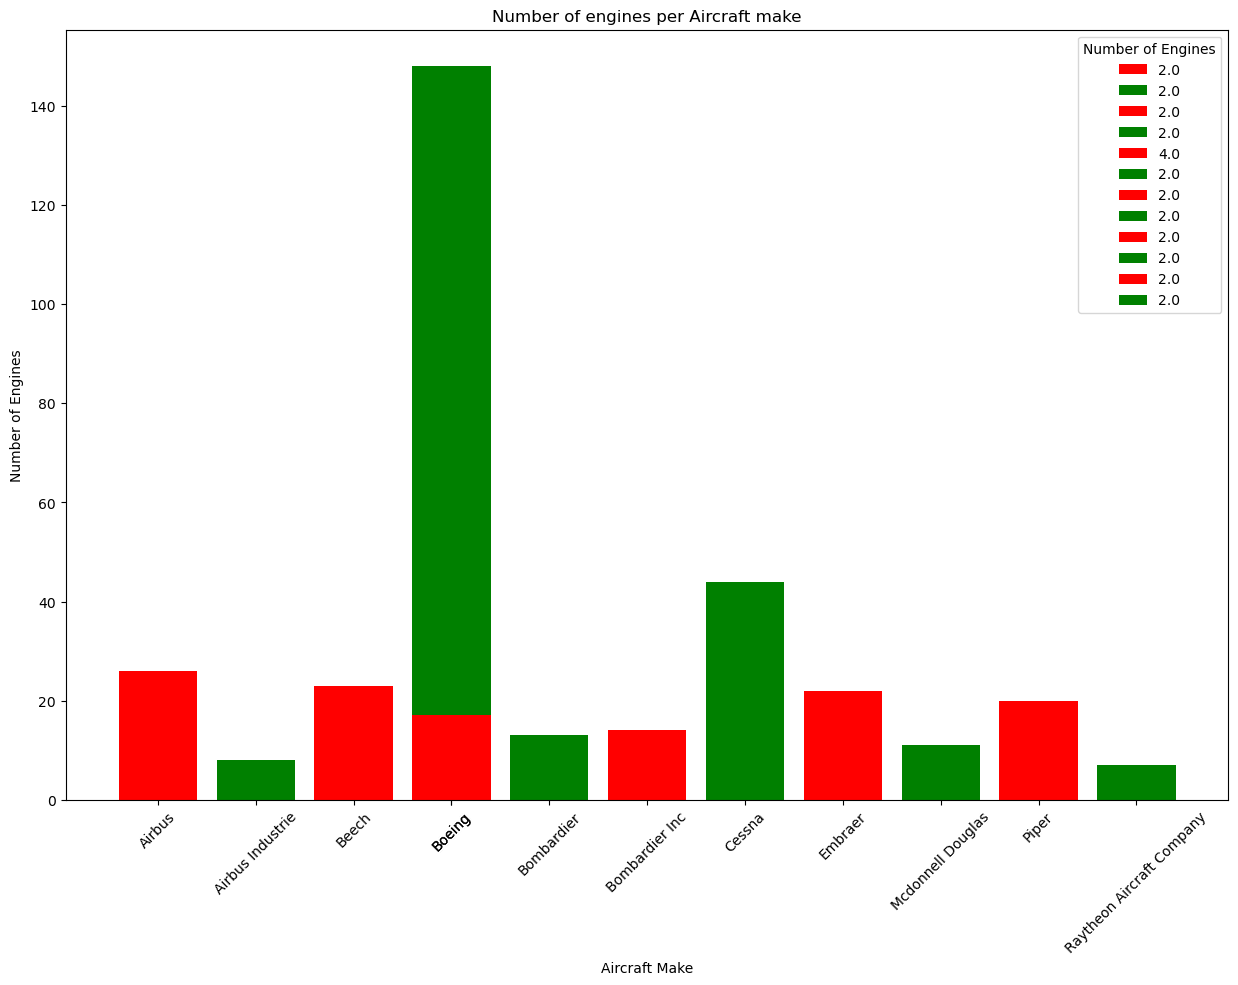

In [90]:
fig, ax = plt.subplots(figsize=(15,10))

categories = list(make_over_ten_aircrafts['Make'])

colors = ['red','green']

ax.bar(commercial_aircrafts['Make'], commercial_aircrafts['Make_count'], label=commercial_aircrafts['Number.of.Engines'],color=colors)
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Engines')
ax.set_title('Number of engines per Aircraft make')
ax.set_xticks(commercial_aircrafts['Make'])
ax.set_xticklabels(commercial_aircrafts['Make'], rotation=45)
ax.set_label('Label via method')
ax.legend(title='Number of Engines')
plt.show();


In [91]:
fig.savefig('Number_of_engines_per_aircraft')

Commercial aircrafts are required to have 4 engines, fora number of safety reasons. Transporting large number of passengers, and cargo/luggage. In the event of engine failure, the other engines can provide additional support to keep the plane stable. Based on these findings, aircrafts that provide the best possbility are boeing aircrafts.

For private use, which require aircrafts to have 2+ engines. Based off of the findings, we can see that Airbus, Beech, Boeing, Bomabardier, Cessna, Embraer, Mcdonnell Douglas, and Piper have the most available aircrafts and have minor, non-fatal incidents. 

In [92]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                1094 non-null   object        
 1   Investigation.Type      1094 non-null   object        
 2   Accident.Number         1094 non-null   object        
 3   Event.Date              1094 non-null   object        
 4   Location                1093 non-null   object        
 5   Country                 1092 non-null   object        
 6   Latitude                549 non-null    object        
 7   Longitude               549 non-null    object        
 8   Airport.Code            673 non-null    object        
 9   Airport.Name            690 non-null    object        
 10  Injury.Severity         1094 non-null   object        
 11  Aircraft.damage         1094 non-null   object        
 12  Aircraft.Category       691 non-null    object    

Next we'll explore the Engine Type for each aircraft

In [93]:
minor_damaged_aircrafts['Engine.Type'].head(50)

230         Turbo Fan
242     Reciprocating
244     Reciprocating
535     Reciprocating
746           Unknown
935       Turbo Shaft
961       Turbo Shaft
1031    Reciprocating
1036    Reciprocating
1112          Unknown
1360       Turbo Prop
1633          Unknown
1634          Unknown
1731    Reciprocating
1969        Turbo Fan
2264    Reciprocating
2315    Reciprocating
2460    Reciprocating
2478          Unknown
2526    Reciprocating
2597    Reciprocating
2656    Reciprocating
3202        Turbo Jet
3560    Reciprocating
3969       Turbo Prop
4040          Unknown
4140    Reciprocating
4189        Turbo Jet
4673    Reciprocating
4705    Reciprocating
5041    Reciprocating
5129        Turbo Jet
5397    Reciprocating
5646    Reciprocating
5824    Reciprocating
6059    Reciprocating
6063    Reciprocating
6384    Reciprocating
6739       Turbo Prop
6781    Reciprocating
6886        Turbo Fan
6949    Reciprocating
7125      Turbo Shaft
7593    Reciprocating
7612        Turbo Jet
7711    Re

There are 5 types of Engines: 

* **Reciprocating Engine** - Also known as a piston engine or internal combustion engine, it is a heat engine using fuel ignition created inside a single or multiple reciprocating pistons to produce high temperatures and high pressure, which generates rotating motion.

* **Turbodrop Engine** - A turboprop engine is a type of aircraft engine offering the low maintenance and high speeds of a gas turbine engine with the reliability of a propeller drive system.

* **Turboshaft Engine** - Turboshaft engines are lightweight and powerful aircraft engines commonly used in real-world applications requiring fuel-efficient, robust, and compact powerplants like tanks, helicopters, hovercrafts, and auxiliary power units.

* **Turbojet Engine** - A turbojet engine is a type of aircraft engine whose primary means of propulsion is the rearward discharge of hot exhaust gas. It is an airbreathing jet engine that works by sucking atmospheric air into a compressor. 

* **TurboFan Engine** - Another air-breathing engine, the turbofan engine, is a type of aircraft engine commonly found on large commercial airliners.

Next, we'll identify the amount of missing values within the Engine Type column, and decide what would be best method to handle the missing the missing values.

In [94]:
# data['Engine.Type'].isna().sum()
minor_damaged_aircrafts['Engine.Type']

230          Turbo Fan
242      Reciprocating
244      Reciprocating
535      Reciprocating
746            Unknown
             ...      
88260              NaN
88445              NaN
88605              NaN
88725              NaN
88795              NaN
Name: Engine.Type, Length: 1094, dtype: object

Now that we have removed the missing values from the engine type within a copy. Let's add it to the make_over_ten_aircrafts dataframe 

In [95]:
minor_damaged_aircrafts['Engine.Type'].isna().sum()

309

In [96]:
# minor_damaged_aircrafts[(minor_damaged_aircrafts['Make'] == 'Airbus') & (minor_damaged_aircrafts['Engine.Type'] == 'Reciprocating')]
minor_damaged_aircrafts.loc[(minor_damaged_aircrafts['Make'] == 'Airbus') & (minor_damaged_aircrafts['Engine.Type'] == 'Turbo Fan')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event_Date,Aircrafts
61671,20070426X00458,Accident,CHI07FA020A,2006-11-07,"Chicago, IL",United States,41.978611,-87.904722,ORD,O'Hare International,...,NaN,NaN,NaN,216.0,IMC,Taxi,Probable Cause,15-02-2018,2006-11-07,Airbus Non-Fatal Minor
67466,20091117X55556,Incident,CEN10IA053,2009-11-15,"Kansas City, MO",United States,391752N,0944250W,MCI,Kansas City International,...,0.0,0.0,0.0,130.0,VMC,NaN,The in-flight engine ingestion of one or more ...,25-09-2020,2009-11-15,Airbus Non-Fatal Minor
67710,20100310X91532,Incident,ENG10WA019,2010-02-09,"Cologne-Bonn Airport, Germany",Germany,NaN,NaN,MNB,Cologne-Bonn Airport,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,03-11-2020,2010-02-09,Airbus Non-Fatal Minor
67954,20100503X82523,Incident,ENG10IA026,2010-04-05,"Newark, NJ",United States,404422N,0074109W,EWR,Newark International Airport,...,0.0,0.0,0.0,140.0,NaN,NaN,The separation of both halves of the left engi...,25-09-2020,2010-04-05,Airbus Non-Fatal Minor
68805,20100827X20401,Incident,WPR10IA430,2010-08-26,"Sacramento, CA",United States,384144N,1213527W,SMF,Sacramento International,...,0.0,7.0,0.0,84.0,VMC,NaN,The first officers inadvertent activation of ...,25-09-2020,2010-08-26,Airbus Non-Fatal Minor
69767,20110404X21934,Incident,DCA11IA040,2011-04-04,"New Orleans, LA",United States,295923N,0901458W,MSY,Louis Armstrong New Orleans,...,0.0,0.0,0.0,109.0,IMC,NaN,the captain's failure to properly recognize an...,25-09-2020,2011-04-04,Airbus Non-Fatal Minor
71864,20130604X82231,Incident,ENG12WA038,2012-05-27,"CAM RANH, Vietnam, Vietnam",Vietnam,NaN,NaN,CXR,CAM RANH Airport Vietnam,...,0.0,0.0,0.0,91.0,NaN,NaN,NaN,03-11-2020,2012-05-27,Airbus Non-Fatal Minor
72334,20121101X94754,Incident,ENG12WA036,2012-08-03,"Rome, Italy",Italy,NaN,NaN,LIRF,"Rome, Italy",...,0.0,0.0,0.0,100.0,NaN,NaN,NaN,25-09-2020,2012-08-03,Airbus Non-Fatal Minor
72366,20120811X13221,Accident,DCA12CA122,2012-08-10,"Dulles, VA",United States,385651N,0077270W,IAD,Washington Dulles Internationa,...,0.0,0.0,0.0,270.0,VMC,NaN,the A330 flight crew's failure to maintain a s...,13-09-2021,2012-08-10,Airbus Non-Fatal Minor
73107,20130118X53100,Accident,DCA13LA039,2013-01-17,"Miami, FL",United States,254725N,0801630W,MIA,Miami Intl,...,0.0,0.0,0.0,397.0,VMC,NaN,LV-BMT flight crew's incorrect evaluation of t...,25-09-2020,2013-01-17,Airbus Non-Fatal Minor


In [97]:
engine_types = minor_damaged_aircrafts.groupby(['Make','Engine.Type','Number.of.Engines']).agg(Total_aircrafts=('Make', 'size')).reset_index()
engines_amount_df = engine_types[engine_types['Total_aircrafts'] >= 10]
engines_amount_df
# engines_amount_df.to_csv('./data/engine_total.csv', index=False)

,Make,Engine.Type,Number.of.Engines,Total_aircrafts
14,Airbus,Turbo Fan,2.0,17
17,Airbus Industrie,Turbo Fan,2.0,12
30,Balloon Works,Unknown,2.0,10
34,Beech,Reciprocating,2.0,12
35,Beech,Turbo Prop,2.0,12
36,Bell,Turbo Shaft,1.0,13
43,Boeing,Turbo Fan,2.0,66
44,Boeing,Turbo Fan,3.0,10
45,Boeing,Turbo Fan,4.0,13
59,Bombardier Inc,Turbo Fan,2.0,10


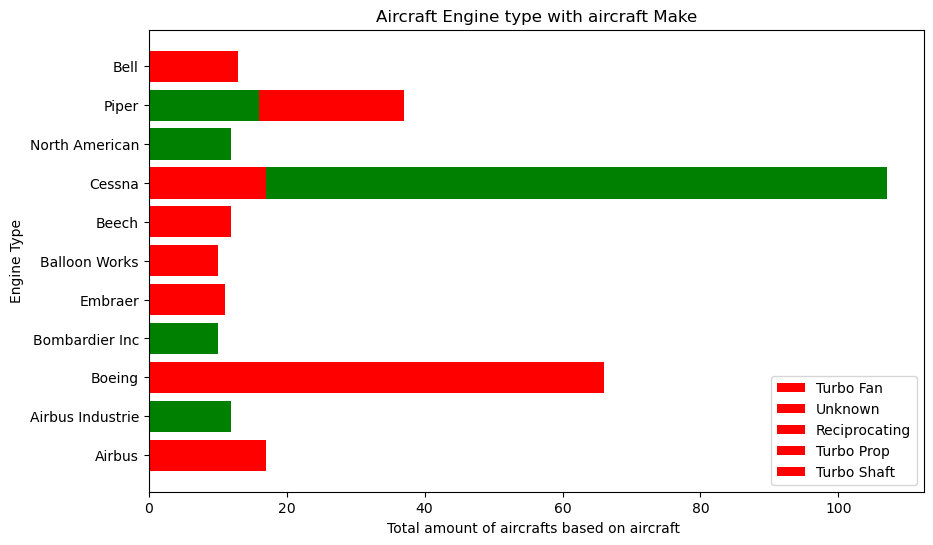

In [100]:
# make_over_ten_aircrafts = pd.merge(make_over_ten_aircrafts,dropped_engine_types_df, left_on='Make', right_index=True, how='left')
# make_over_ten_aircrafts
# Plot horizontal bars for each engine type

fig, ax = plt.subplots(figsize=(10,6))


for i, engine_type in enumerate(engines_amount_df['Engine.Type'].unique()):
    subset_df = engines_amount_df[engines_amount_df['Engine.Type'] == engine_type]
    ax.barh(subset_df['Make'], subset_df['Total_aircrafts'], label=engine_type, color=colors)
ax.set_title('Aircraft Engine type with aircraft Make')
ax.set_xlabel('Total amount of aircrafts based on aircraft ')
ax.set_ylabel('Engine Type')
ax.legend(loc='lower right')
plt.show();

In [101]:
fig.savefig('Aircraft_Engines_with_aircraft_make')

As we can see aircrafts that provide the most available engine types are boeing, and cessna. Having **Turbo Prop** and **Turbo Fan** engines.

The final assessment will be the weather conditions for each aircraft

In [102]:
minor_damaged_aircrafts['Weather.Condition']

230      IMC
242      VMC
244      VMC
535      IMC
746      VMC
        ... 
88260    VMC
88445    NaN
88605    NaN
88725    VMC
88795    VMC
Name: Weather.Condition, Length: 1094, dtype: object

**VMC** conditions describe the weather conditions and situations in which a pilot can sufficiently and safely maintain visuals of all other aircraft and the terrain around them. The factors that affect VMC include visibility, cloud ceilings, and cloud clearances. During VMC, VFR flight is permitted.

**IMC** conditions describe a situation in which visibility and the weather require the pilot to rely on their instruments, and thus conduct an IFR flight. This is typically done when flying through clouds, as well as general bad weather. Pilots are sometimes trained to fly in such conditions to teach them to rely on instrument indications.

In [103]:
minor_damaged_aircrafts['Weather.Condition'].isna().sum()

269

In [104]:
minor_damaged_aircrafts.dropna(subset=['Weather.Condition'], inplace=True)

C:\Users\omend\AppData\Local\Temp\ipykernel_36396\2063450494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts.dropna(subset=['Weather.Condition'], inplace=True)


In [105]:
minor_damaged_aircrafts['Weather.Condition'].isna().sum()

0

In [134]:
weather_df = minor_damaged_aircrafts.groupby(['Make','Weather.Condition']).agg(Total_weather_condition=('Make', 'size')).reset_index()
total_weather_aircrafts = weather_df[(weather_df['Total_weather_condition'] > 10)]
total_weather_aircrafts
# total_weather_aircrafts.to_csv('./data/total_weather_conditions_per_aircraft.csv', index=False)

,Make,Weather.Condition,Total_weather_condition
17,Airbus,VMC,11
20,Airbus Industrie,VMC,13
30,Balloon Works,VMC,15
35,Beech,VMC,30
37,Bell,VMC,13
43,Boeing,IMC,14
46,Boeing,VMC,73
71,Cessna,VMC,138
106,Embraer,VMC,13
165,Mcdonnell Douglas,VMC,15


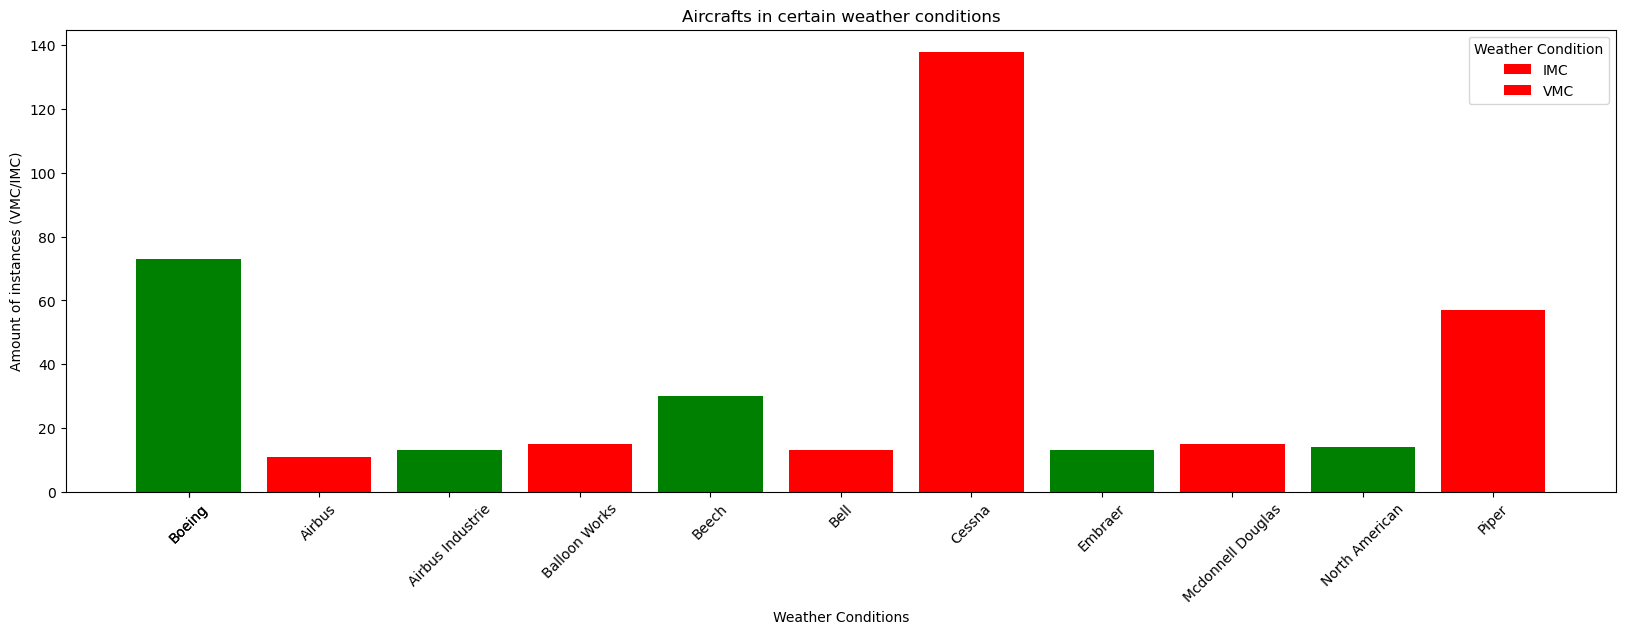

In [149]:
fig, ax = plt.subplots(figsize=(20,6))

# colors = ['red','green']
# weather_conditions = sorted(total_weather_aircrafts['Weather.Condition'].unique())

for i, condition in enumerate(weather_conditions):
    subset_df = total_weather_aircrafts[total_weather_aircrafts['Weather.Condition'] == condition]
    ax.bar(subset_df['Make'], subset_df['Total_weather_condition'], label=condition, color=colors)
    
# ax.bar(total_weather_aircrafts['Make'], total_weather_aircrafts['Total_weather_make'], label=sorted(total_weather_aircrafts['Weather.Condition']), color=colors)
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Amount of instances (VMC/IMC)')
ax.set_title('Aircrafts in certain weather conditions')
ax.set_xticks(total_weather_aircrafts['Make'])
ax.set_xticklabels(total_weather_aircrafts['Make'], rotation=45)
ax.legend(title='Weather Condition')
plt.show();

Based off the visualization and data provided above, aircrafts that encountered weather conditions **VMC**:

* Beech
* Bell
* Boeing
* Cessna
* Cirrus Design Corp

All other aircrafts that fall under the scope of **IMC** does not neccessarily eliminate the aircraft but I decided to focus on aircrafts that have more than one instance experiencing weather conditions.

# Conclusion

Based off of the ananlysis of this dataset. Assessing certain aspects of wach aircrafts ranging from Injury-Severity to the Weather Condition. After creating a copy of the original dataframe to ensure that we have aircrafts that fall under **Minor** and **Non-Fatal** categories.

We are able to conclude that the best aircrafts availble for commercial and private use would be as follows:
* 1. Boeing
* 2. Cessna
* 3. Airbus/Piper
